# Hyper-parameter tuning

In [2]:
%load_ext autoreload
%autoreload 2

!python --version

Python 3.7.6


In [3]:
import sys
sys.path.append('..')

## Classification

In [25]:
from src.evaluation import custom_classification_report

### Load the dataset

In [8]:
from src.dataset import DatasetForClassification

dataset = DatasetForClassification('../data/fifa_processed_for_cls.csv', ['Position (4)', 'Position (13)'])

### Classification of "Position (4)"

In [11]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (4)')

labels = dataset.get_labels('Position (4)')

Do oversampling based on the results from 09_SMOTE.ipynb. We use the method which performed the best.

In [12]:
from imblearn.over_sampling import SVMSMOTE

sm = SVMSMOTE(
    k_neighbors=20,
    m_neighbors=40,
    n_jobs=-1,
    out_step=0.5,
    random_state=42,
    sampling_strategy='auto',
    svm_estimator=None)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Select features based on the results from 10_feature_selection.ipynb. We use the method which performed the best.

In [21]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

sel = GenericUnivariateSelect(chi2, 'k_best', param=42)
sel.fit(X_train, y_train)

selected_columns = []

for selected, column in zip(sel.get_support(), X_train_res.columns):
    if selected:
        selected_columns.append(column)

In [23]:
X_train_res_sel = X_train_res[selected_columns]
X_test_sel = X_test[selected_columns]

#### Training

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

attack
precision: 0.8117647058823529
recall: 0.8466257668711656
f1-score: 0.8288288288288288
support: 652


defense
precision: 0.9394987035436474
recall: 0.9403114186851211
f1-score: 0.9399048854301774
support: 1156


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8795093795093795
recall: 0.8614840989399293
f1-score: 0.8704034273473759
support: 1415


accuracy: 0.8994490358126722


macro avg
precision: 0.907693197233845
recall: 0.912105321124054
f1-score: 0.9097842854015955
support: 3630


weighted avg
precision: 0.8999550582747995
recall: 0.8994490358126722
f1-score: 0.8995998054132833
support: 3630


F1
micro: 0.8994490358126722
macro: 0.9097842854015955


CPU times: user 2.28 s, sys: 572 ms, total: 2.85 s
Wall time: 3min 3s


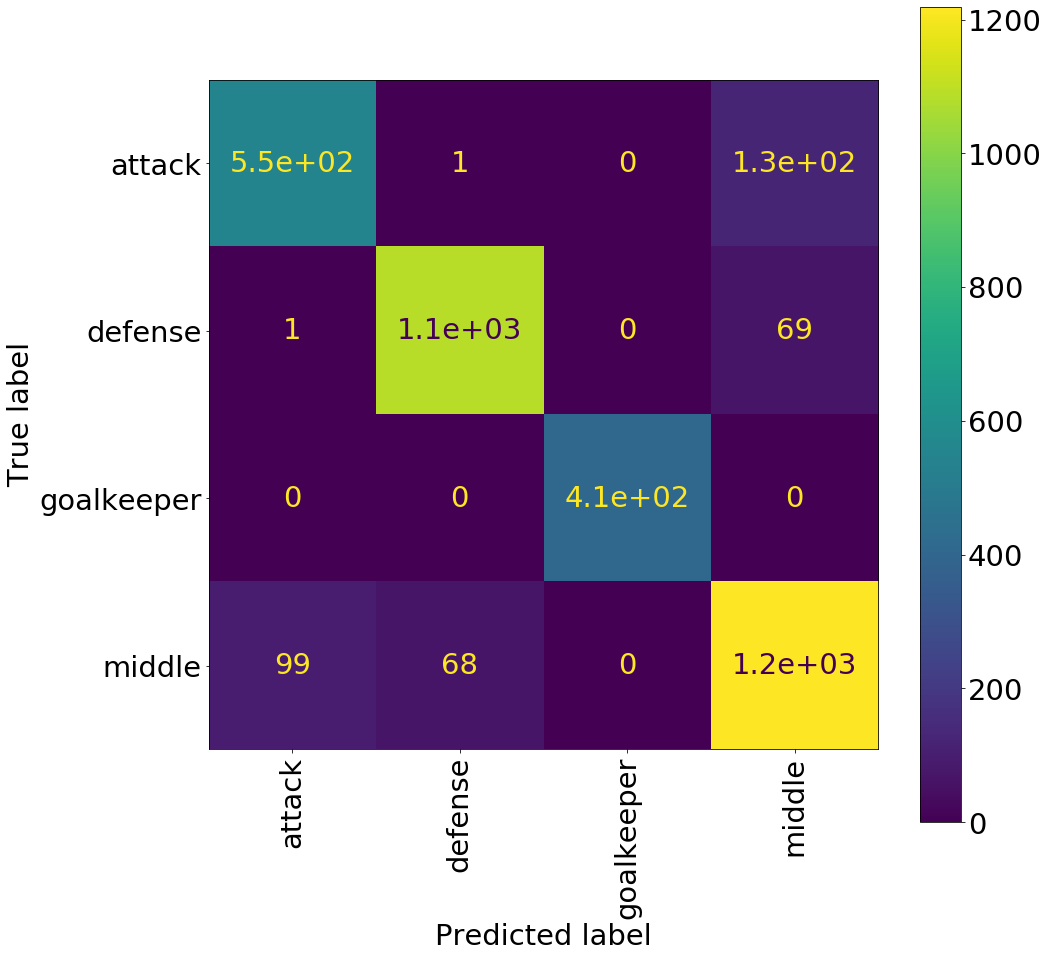

In [30]:
%%time

clf_lr = LogisticRegression(max_iter=10000, n_jobs=-1)
clf_rf = RandomForestClassifier(random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=100)
clf_ada = AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(random_state=42), random_state=42)

estimators = [
    ('lr', clf_lr),
    ('rf', clf_rf),
    ('gb', clf_gb),
    ('ada', clf_ada)
]

clf = StackingClassifier(estimators=estimators, cv=5, n_jobs=-1, final_estimator=LogisticRegression(max_iter=10000, n_jobs=-1))

clf.fit(X_train, y_train)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

#### Evaluate

attack
precision: 0.8117647058823529
recall: 0.8466257668711656
f1-score: 0.8288288288288288
support: 652


defense
precision: 0.9394987035436474
recall: 0.9403114186851211
f1-score: 0.9399048854301774
support: 1156


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8795093795093795
recall: 0.8614840989399293
f1-score: 0.8704034273473759
support: 1415


accuracy: 0.8994490358126722


macro avg
precision: 0.907693197233845
recall: 0.912105321124054
f1-score: 0.9097842854015955
support: 3630


weighted avg
precision: 0.8999550582747995
recall: 0.8994490358126722
f1-score: 0.8995998054132833
support: 3630


F1
micro: 0.8994490358126722
macro: 0.9097842854015955




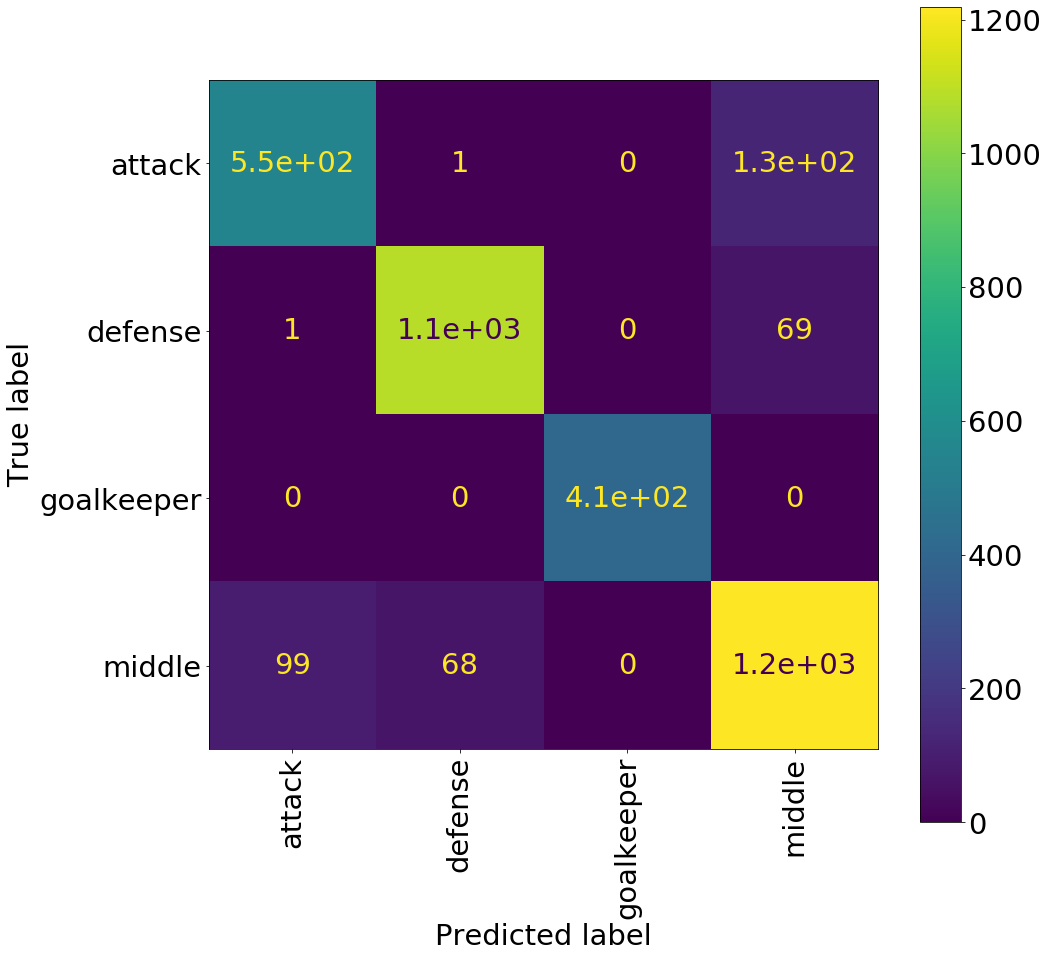

In [32]:
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

### Classification of "Position (13)"

Oversampling.

In [ ]:
from imblearn.over_sampling import SVMSMOTE

sm = SVMSMOTE(
    k_neighbors=20,
    m_neighbors=40,
    n_jobs=-1,
    out_step=0.5,
    random_state=42,
    sampling_strategy='auto',
    svm_estimator=None)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Feature selection.

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

sel = GenericUnivariateSelect(chi2, 'k_best', param=42)
sel.fit(X_train, y_train)

selected_columns = []

for selected, column in zip(sel.get_support(), X_train_res.columns):
    if selected:
        selected_columns.append(column)

In [ ]:
X_train_res_sel = X_train_res[selected_columns]
X_test_sel = X_test[selected_columns]

#### Training

In [ ]:
TODO

#### Evaluate

In [ ]:
TODO

### Conclusion

In [ ]:
TODO

## Regression

### Load the dataset

In [4]:
from src.dataset import DatasetForRegression

dataset = DatasetForRegression('../data/fifa_processed_for_reg.csv', ['Value'])

In [5]:
X_train, X_test, y_train, y_test = dataset.get_data('Value')

We will compare all features with the selected features from `10_feature_selection.ipynb` ('Age', 'Overall', 'Potential').

### Train

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

We will use GradientBoostingRegressor since it was the best regressor.

We will do hyper-parameter tunning in several steps, we will start with the most important parameters (those) which make a significant impact on a model. We followed this [tutorial](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/).

Firstly we will try different number of estimators.

In [12]:
%%time

gbr = GradientBoostingRegressor(random_state=42)
distributions = { "n_estimators": range(50, 500, 10) }

clf = GridSearchCV(gbr, distributions, n_jobs=-1, scoring="neg_root_mean_squared_error", verbose=1)

search_1 = clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 33.6min finished


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [17]:
search_1.cv_results_

{'mean_fit_time': array([ 6.93456783,  7.06811666,  7.90007558,  9.91489224, 10.00333519,
        11.26255484, 12.80386577, 15.12811155, 14.50466151, 21.96953168,
        26.12992167, 35.40817227, 32.84763651, 28.89457026, 23.02217317,
        27.83578353, 33.05760593, 36.6510509 , 40.60575747, 44.36331282,
        38.56671147, 37.04362926, 38.89994831, 38.80694933, 36.33500366,
        37.27794099, 39.20158076, 33.12102332, 36.86741834, 37.90200648,
        40.54676242, 44.00004163, 53.67693181, 53.54682765, 48.82157311,
        48.61794519, 50.1660769 , 52.54263744, 50.57940531, 54.12205367,
        55.67240586, 57.215242  , 59.08511262, 58.59593973, 51.94273281]),
 'std_fit_time': array([0.44547508, 0.84828903, 0.50766544, 1.01266263, 0.35406361,
        1.31497767, 0.99276312, 0.70259388, 0.64464495, 1.72829268,
        2.71159036, 2.01750726, 3.21227016, 1.13969154, 3.54780956,
        4.22880906, 1.38106028, 0.17539725, 2.31110032, 1.89486184,
        2.08251593, 3.63401745, 2.18

We will hyper-tune max_depth & min_samples_split.

In [ ]:
%%time

gbr = GradientBoostingRegressor(random_state=42, n_jobs=-1)

distributions = { "max_depth": range(5, 16, 2), "min_samples_split": range(200, 1001, 200) }

clf = GridSearchCV(gbr, distributions, n_jobs=-1, scoring="neg_root_mean_squared_error", verbose=1)

search_2 = clf.fit(X_train, y_train)

search_2.grid_scores_, search_3.best_params_, search_2.best_score_

We will hyper-tune min_samples_split & min_samples_leaf.

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, n_jobs=-1)

distributions = { "min_samples_split": range(1000, 2100, 200), "min_samples_leaf": range(30, 71, 10) }

clf = GridSearchCV(gbr, distributions, n_jobs=-1, scoring="neg_root_mean_squared_error", verbose=1)

search_3 = clf.fit(X_train, y_train)

search_3.grid_scores_, search_3.best_params_, search_3.best_score_

We will hyper-tune max_features.

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, n_jobs=-1)

distributions = { "max_features": range(3, 80, 5) }

clf = GridSearchCV(gbr, distributions, n_jobs=-1, scoring="neg_root_mean_squared_error", verbose=1)

search_4 = clf.fit(X_train, y_train)

search_4.grid_scores_, search_4.best_params_, search_4.best_score_

We will hyper-tune subsample.

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, n_jobs=-1)

distributions = { "subsample": [0.6,0.7,0.75,0.8,0.85,0.9] }

clf = GridSearchCV(gbr, distributions, n_jobs=-1, scoring="neg_root_mean_squared_error", verbose=1)

search_5 = clf.fit(X_train, y_train)

search_5.grid_scores_, search_5.best_params_, search_5.best_score_

Final configuration of our classifier.

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, n_jobs=-1)

### Evaluate

In [ ]:
custom_regression_report(clf, X_test, y_test)

### Conclusion

In [ ]:
TODO